In [1]:
import random
import matplotlib.pyplot as plt

#Generar red aleatoria

In [2]:
def rand_network(n,m,p):
    network = []
    for i in range (0,n):
        network.append([])
        for j in range (0,m):
            rand = random.random()
            if rand<p:
                network[i].append(True)
                #el nodo esta conenctado
            else:
                network[i].append(False)
                #el nodo esta desconectado

    return network

In [3]:
#retorna las posiciones donde un nodo esta conectado en una fila
def ret_row_true(network,row):
    ans = []
    for i in range (0,len(network[row])):
        if network[row][i]:
            ans.append([row,i])
    return ans

#Encontrar camino 
la función retorna verdadero si hay un camino a traves de la red desde un punto inicial, se van añadiendo todos los nodos a los que se puede accerder directamente desde el nodo inicial a una lista, despues se toman los nodos que se añadieron y se hace lo mismo hasta que se llega hasta lu ultima fila (hay camino) o ya no se puede avanzar mas.

In [4]:
def find_path(network,visited,inicial,path):
    j=0
    rows= len (network)
    columns= len(network[0])
    while True:
        try:
            row = path[j][0]
            column = path[j][1]
            if path[j][0]==rows-1 and network[row][column]:
                return True
            if row-1>=0:
                if network[row-1] [column] and not (str([row-1,column]) in visited):
                    path.append([row-1,column])
                    visited.add(str([row-1,column]))
            if row+1<rows:
                if network[row+1] [column] and not (str([row+1,column]) in visited):
                    if row+1 == rows-1: return True
                    path.append([row+1,column])
                    visited.add(str([row+1,column]))
            if column-1>=0:
                if network[row] [column-1] and not (str([row,column-1]) in visited):
                    path.append([row,column-1])
                    visited.add(str([row,column-1]))
            if column+1<columns:
                if network[row] [column+1] and not (str([row,column+1]) in visited):
                    path.append([row,column+1])
                    visited.add(str([row,column+1]))
            j+=1 
        except: 
            break
    return False


#Función simular 
Retorna true si hay un camino posible o false si no.

In [5]:
def simulate(network):
    inicial = ret_row_true(network,0)
    final = ret_row_true(network,len(network)-1)
    if len(inicial)<=0 or len(final)<=0:
        return False
    for i in range(0,len(inicial)):
        path = []
        visited = set()
        path.append(inicial[i])
        visited.add(str(inicial[i]))
        if find_path(network,visited,inicial,path):
            return True
    return False

#Parámetros de la simulación
En la siguiente celda es posible cambiar los parámetros de la simulación.
Los parametros son:
- Incremento de p: El incremento de p, p corresponde a la probabilidad de que un nodo esté disponible, el valor de p va desde 0 hasta 1 variando según el aumento.
- Cantidad de simulaciones para cada p: La cantidad de veces que se va a simular para cada p.
- Cantidad de filas: Cantidad de filas de la red.
- Cantidad de columnas: Cantidad de columnas de la red.


In [6]:
increment = 0.001
iterations = 200
rows = 5
columns = 5
ans =[]
ans.append([])
ans.append([])
p=0

#Ejecutar simulación

In [7]:
for i in range (0, int(1/increment)+1):
    aux=0
    for j in range(0, iterations):        
        #simular nueva red
        network = rand_network(rows,columns,p)
        if (simulate(network)):
            #si hay un camino sumar uno 
            aux+=1
    #p = numero de redes con camino / numero de redes simuladas
    p_theta=aux/iterations
    ans[0].append(p)
    ans[1].append(p_theta)
    p += increment 


#Resultado de la simulación
En el siguiente gráfico se muestran los resultados de la simulación donde:  
- p corresponde a la probabilidad de que un nodo este disponible.
- theta(p) corresponde a la probabilidad de haya un camino a través de la red.

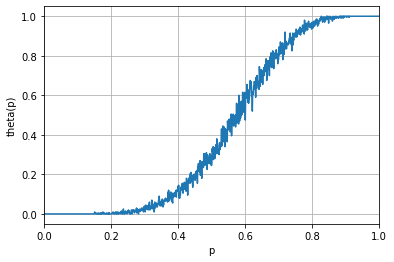

In [8]:
plt.plot(ans[0],ans[1])
plt.ylabel("theta(p)")
plt.xlabel("p")
plt.grid()
plt.xlim((0, 1))
plt.show()

#Ver theta(p) para un p determinado
En la siguiente selda es posible modificar los parametros de la simulación para un p determinado.

In [11]:
p = 0.5 
iterations2 = 200000
rows2 = 5
columns2 = 5

#Resultados

In [12]:
aux=0
for j in range(0, iterations2):        
  #simular nueva red
  network = rand_network(rows2,columns2,p)
  if (simulate(network)):
    #si hay un camino sumar uno 
    aux+=1
    #p = numero de redes con camino / numero de redes simuladas
    p_theta=aux/iterations2
print("p={}  theta(p)={}".format(p,p_theta))

p=0.5  theta(p)=0.30033
